# <center> Analysis of the ULX's NGC7793 P9<center>

# <center> Hardness ratios <center>

### <center>Alba Rodríguez Castellano, UCM<center>

#### <center> Supervised by: Felix Fuerst, ESAC<center>

In [1]:
import pandas as pd
import astropy as atp
from astropy.units import Quantity
from astropy import units as u
import seaborn as sns
import numpy as np
from astropy.table import QTable, Table
from astropy.time import TimeMJD, Time, TimeString,TimeDelta
import pylab
import matplotlib as mpl
mpl.rcParams['font.size'] = 17.0
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 2
import matplotlib.pyplot as plt
from astropy.timeseries import TimeSeries, aggregate_downsample
plt.style.use('seaborn-whitegrid')

### Part 1: Importing data.

> To do this we divide the initial data into 3 different files: Hard data, Soft data and HR data.

In [2]:
hard= pd.read_csv('hard.dat', sep='\s+',comment='!', engine='python',header=None) 
soft= pd.read_csv('soft.dat', sep='\s+',comment='!', engine='python',header=None) 
ratio= pd.read_csv('ratio.dat', sep='\s+',comment='!', engine='python',header=None) 

In [3]:
df_hard= pd.read_csv('curve_plain.dat', sep='\s+',comment='!', engine='python',header=None) 
upperlimits=pd.read_csv('upper.dat', sep='\s+',comment='!', engine='python',header=None) 

In [4]:
headers = ["time", "time error (+ve)", "time error (-ve)", "source count-rate","source error(+)", "source error (-)","ObsID"]
df_hard.columns = headers
upperlimits.columns=headers

In [5]:
headers = ["Time", "Err pos", "Err neg", "Rate","Error","ObsID"]
hard.columns=headers
soft.columns=headers
ratio.columns=headers

> Here we put every column in the same dataframe

In [6]:
hard["Soft Rate"]=soft["Rate"]
hard["Soft Error"]=soft["Error"]
hard["Hard Rate"]=hard["Rate"]
hard["Hard Error"]=hard["Error"]
hard["Theoretical HR"]=ratio["Rate"]
hard["Theoretical HR Error"]=ratio["Error"]

### Part 2: Dropping negative values & NaN. Calculating HRs.

First, we drop the negative values:

In [7]:
hard=hard[(hard['Hard Rate']>0) & (hard['Soft Rate']>0)]

And then calculate de HRs

In [8]:
hard["Hardness ratios"]=(hard["Hard Rate"]-hard["Soft Rate"])/(hard["Hard Rate"]+hard["Soft Rate"])

In [9]:
hard['Time'] = hard['Time'].astype(float)

In [10]:
hard=hard.drop(["ObsID","Rate","Error"], axis=1)

In [43]:
hard["source count-rate"]=df_hard["source count-rate"]

ValueError: Length of values (260) does not match length of index (267)

In [11]:
hard

,Time,Err pos,Err neg,Soft Rate,Soft Error,Hard Rate,Hard Error,Theoretical HR,Theoretical HR Error,Hardness ratios
2,1.099844e+06,15250.174,-15250.174,0.000219,0.000308,0.000551,0.000459,2.516913,4.117826,0.431169
4,1.753094e+06,31529.095,-31529.095,0.002411,0.001033,0.000759,0.000622,0.314819,0.291074,-0.521136
9,3.820571e+06,6402.967,-6402.967,0.000662,0.000517,0.000267,0.000382,0.402872,0.656962,-0.425188
14,5.564394e+06,8699.363,-8699.363,0.000516,0.000582,0.000548,0.000620,1.061677,1.696935,0.030075
17,3.246636e+07,3119.464,-3119.464,0.005258,0.001792,0.001000,0.000822,0.190108,0.169252,-0.680409
...,...,...,...,...,...,...,...,...,...,...
303,3.224077e+08,356.037,-356.037,0.010026,0.004198,0.008293,0.003837,0.827193,0.516145,-0.094601
304,3.232493e+08,231.925,-231.925,0.033846,0.012088,0.003856,0.004120,0.113921,0.128361,-0.795449
305,3.237087e+08,225.657,-225.657,0.013593,0.006217,0.005335,0.003923,0.392472,0.339851,-0.436285
306,3.242250e+08,512.743,-512.743,0.006326,0.002939,0.002490,0.001859,0.393548,0.346044,-0.435118


In [12]:
hard.dropna(subset=["Hard Rate","Soft Rate","Hard Error","Soft Error","Hardness ratios","Theoretical HR","Theoretical HR Error"], axis=0, inplace=True)
hard.head(5)

,Time,Err pos,Err neg,Soft Rate,Soft Error,Hard Rate,Hard Error,Theoretical HR,Theoretical HR Error,Hardness ratios
2,1.099844e+06,15250.174,-15250.174,0.000219,0.000308,0.000551,0.000459,2.516913,4.117826,0.431169
4,1.753094e+06,31529.095,-31529.095,0.002411,0.001033,0.000759,0.000622,0.314819,0.291074,-0.521136
9,3.820571e+06,6402.967,-6402.967,0.000662,0.000517,0.000267,0.000382,0.402872,0.656962,-0.425188
14,5.564394e+06,8699.363,-8699.363,0.000516,0.000582,0.000548,0.000620,1.061677,1.696935,0.030075
17,3.246636e+07,3119.464,-3119.464,0.005258,0.001792,0.001000,0.000822,0.190108,0.169252,-0.680409


### Part 3: Converting time.

>Here we only convert Hard Time Data  because it's the same as the others and we only need it to plot the graphs

In [13]:
t=Time('2010:228:0:49:57.216',format='yday') #definimos T0
t1=t.mjd #lo pasamos a MJD

In [14]:
hard=QTable.from_pandas(hard)


In [15]:
hard["Time"].unit = u.s#we define our column units
hard['Time']=hard['Time'].to(u.d)/u.d

In [16]:
hard['Time']=hard['Time']+t1

In [17]:
hard

Time,Err pos,Err neg,Soft Rate,Soft Error,Hard Rate,Hard Error,Theoretical HR,Theoretical HR Error,Hardness ratios
,,,,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
55436.76436136574,15250.173999999999,-15250.173999999999,0.00021899999999999998,0.000308,0.000551,0.000459,2.516913,4.117826,0.4311688311688311
55444.325126435186,31529.095,-31529.095,0.002411,0.001033,0.000759,0.0006219999999999999,0.314819,0.291074,-0.5211356466876971
55468.254261979164,6402.967,-6402.967,0.000662,0.000517,0.000267,0.00038199999999999996,0.40287199999999995,0.6569619999999999,-0.4251883745963402
55488.437402488424,8699.363000000001,-8699.363000000001,0.000516,0.000582,0.0005480000000000001,0.00062,1.061677,1.6969349999999999,0.03007518796992493
55799.80269866898,3119.4640000000004,-3119.4640000000004,0.005258,0.0017920000000000002,0.001,0.000822,0.190108,0.16925199999999999,-0.6804090763822307
55802.570858391206,17630.496,-17630.496,0.006068,0.0022649999999999997,0.004863,0.002114,0.8013060000000001,0.459088,-0.1102369408105388
56128.63293570602,17545.583,-17545.583,0.001739,0.001139,0.00122,0.0009550000000000001,0.701692,0.716141,-0.17539709361270706
56138.78598266204,17943.367,-17943.367,0.000925,0.000453,0.000542,0.000349,0.585494,0.47426999999999997,-0.26107702794819365


### Part 4: Error Propagation

> Now, we do error propagation for the HRs just using the gaussian error propagation formula:

 $\Delta(HRs)=\sqrt{(\frac{d(HR)}{d S}\cdot\Delta S)^2 + (\frac{d(HR)}{d H}\cdot\Delta H)^2}$

  > where:
  
  $\frac{d(HR)}{d S}=\frac{-2H}{(H+S)^2}$ & $\frac{d(HR)}{d H}=\frac{2S}{(H+S)^2}$

In [18]:
den=(hard["Hard Rate"]+hard["Soft Rate"])**2
s=-2*hard["Hard Rate"]
h=2*hard["Soft Rate"]
hard["Error propagation"]=np.sqrt(((h/den)*hard["Hard Error"])**2+((s/den)*hard["Soft Error"])**2)

    

### Part 5: Plot.

> It's the moment to plot our HRs. First, we represent here the entire plot (we zoomed it in to see better what happen):

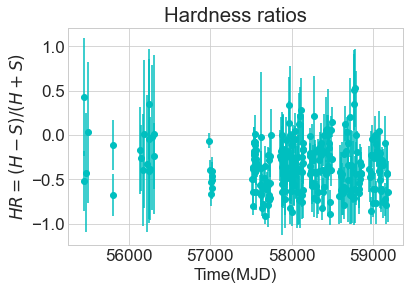

In [19]:
plt.title("Hardness ratios") 
datos=plt.errorbar(hard["Time"],hard["Hardness ratios"], yerr=hard["Error propagation"], fmt='oc')
plt.ylabel("$HR=(H-S)/(H+S)$")                       
plt.xlabel("Time(MJD)") 
plt.savefig('Hardness_ratios.png', bbox_inches='tight')



> Secondly, we are going to represent each cluster (big amount of points) separately to observe in a better way our data

In [20]:
df={'cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3']} #Labels for the graphics
df_datos = pd.DataFrame(df)

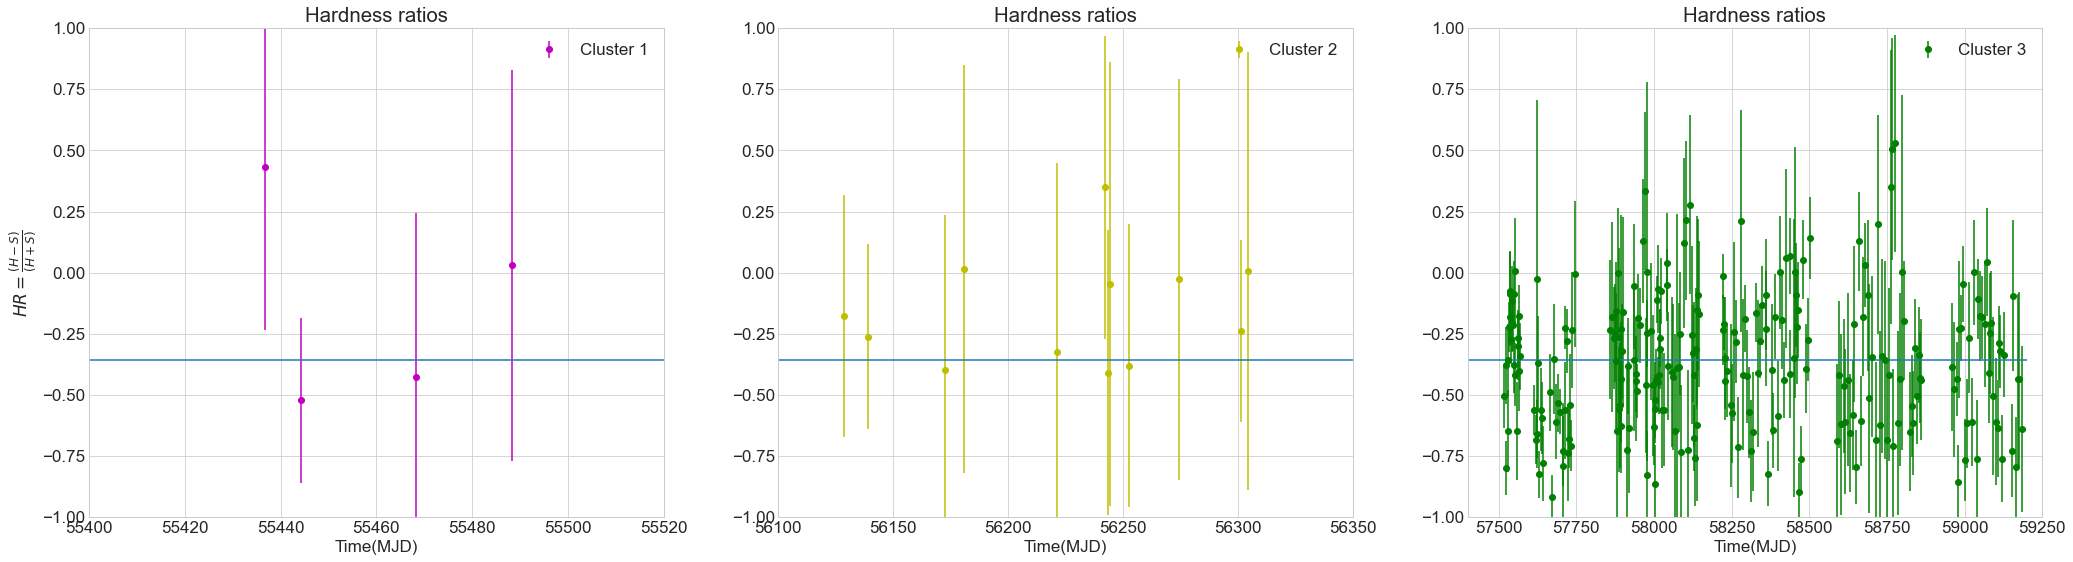

<Figure size 432x288 with 0 Axes>

In [21]:
color = ['om','oy','og'] #vector to put different colours in the graphic
fig, axs = plt.subplots(1,3,figsize=(35,9))
for i in range(3):
    axs[i].errorbar(hard["Time"],hard["Hardness ratios"], yerr=hard["Error propagation"],fmt=color[i],label = f'{df_datos.cluster.values[i]}')
    axs[i].hlines(y=hard["Hardness ratios"].mean(), xmin=55400, xmax=59200)
    axs[i].legend()
    axs[i].set_xlabel("Time(MJD)")
    axs[i].set_title("Hardness ratios") 
    axs[i].set(ylim=(-1,1))
    if i == 0:
        axs[i].set_ylabel("$HR=\\frac{(H-S)}{(H+S)}$")
        axs[i].set(xlim=(55400,55520))
    if i==1:
        axs[i].set(xlim=(56100,56350))
    if i==2:
        axs[i].set(xlim=(57400,59250))
plt.show()
plt.savefig('Hardness_ratios_Clusters.png',bbox_inches='tight')

### Part 6: Binning

As we see there are a lot of points together and big errors that don't let us to see well what's happening. Because of this, we are going to bin our data in order to obtain a more clarified figure.

In [22]:
t=Time('2010:228:0:49:57.216',format='yday') #definimos T0
t1=t.mjd

In [23]:
hard['TimeNew']=hard['Time']-t1

In [24]:
hard=QTable.to_pandas(hard)

In [25]:
hard

,Time,Err pos,Err neg,Soft Rate,Soft Error,Hard Rate,Hard Error,Theoretical HR,Theoretical HR Error,Hardness ratios,Error propagation,TimeNew
0,55436.764361,15250.174,-15250.174,0.000219,0.000308,0.000551,0.000459,2.516913,4.117826,0.431169,0.665354,12.729671
1,55444.325126,31529.095,-31529.095,0.002411,0.001033,0.000759,0.000622,0.314819,0.291074,-0.521136,0.336800,20.290436
2,55468.254262,6402.967,-6402.967,0.000662,0.000517,0.000267,0.000382,0.402872,0.656962,-0.425188,0.667653,44.219572
3,55488.437402,8699.363,-8699.363,0.000516,0.000582,0.000548,0.000620,1.061677,1.696935,0.030075,0.798059,64.402712
4,55799.802699,3119.464,-3119.464,0.005258,0.001792,0.001000,0.000822,0.190108,0.169252,-0.680409,0.238945,375.768009
...,...,...,...,...,...,...,...,...,...,...,...,...
262,59155.604814,356.037,-356.037,0.010026,0.004198,0.008293,0.003837,0.827193,0.516145,-0.094601,0.309214,3731.570124
263,59165.345843,231.925,-231.925,0.033846,0.012088,0.003856,0.004120,0.113921,0.128361,-0.795449,0.206874,3741.311153
264,59170.663269,225.657,-225.657,0.013593,0.006217,0.005335,0.003923,0.392472,0.339851,-0.436285,0.350568,3746.628579
265,59176.638424,512.743,-512.743,0.006326,0.002939,0.002490,0.001859,0.393548,0.346044,-0.435118,0.356428,3752.603734


In [26]:
hardtiempo=hard['TimeNew'].to_numpy()

In [27]:
tiempo=[]
for i in range(267):
    tiempo.append(hardtiempo[i]+t)

In [28]:
hard=QTable.from_pandas(hard)

In [29]:
hard['TimeNew']=tiempo

In [30]:
hard

Time,Err pos,Err neg,Soft Rate,Soft Error,Hard Rate,Hard Error,Theoretical HR,Theoretical HR Error,Hardness ratios,Error propagation,TimeNew
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
55436.76436136574,15250.173999999999,-15250.173999999999,0.00021899999999999998,0.000308,0.000551,0.000459,2.516913,4.117826,0.4311688311688311,0.6653540420230587,2010:240:18:20:40.822
55444.325126435186,31529.095,-31529.095,0.002411,0.001033,0.000759,0.0006219999999999999,0.314819,0.291074,-0.5211356466876971,0.3367998437774429,2010:248:07:48:10.924
55468.254261979164,6402.967,-6402.967,0.000662,0.000517,0.000267,0.00038199999999999996,0.40287199999999995,0.6569619999999999,-0.4251883745963402,0.6676531643758967,2010:272:06:06:08.235
55488.437402488424,8699.363000000001,-8699.363000000001,0.000516,0.000582,0.0005480000000000001,0.00062,1.061677,1.6969349999999999,0.03007518796992493,0.7980594325042215,2010:292:10:29:51.575
55799.80269866898,3119.4640000000004,-3119.4640000000004,0.005258,0.0017920000000000002,0.001,0.000822,0.190108,0.16925199999999999,-0.6804090763822307,0.2389448525650301,2011:238:19:15:53.165
55802.570858391206,17630.496,-17630.496,0.006068,0.0022649999999999997,0.004863,0.002114,0.8013060000000001,0.459088,-0.1102369408105388,0.28300759370472467,2011:241:13:42:02.165
56128.63293570602,17545.583,-17545.583,0.001739,0.001139,0.00122,0.0009550000000000001,0.701692,0.716141,-0.17539709361270706,0.49463003506875536,2012:202:15:11:24.645
56138.78598266204,17943.367,-17943.367,0.000925,0.000453,0.000542,0.000349,0.585494,0.47426999999999997,-0.26107702794819365,0.3769219207013418,2012:212:18:51:47.902
56172.48401703704,3472.993,-3472.993,0.0008880000000000001,0.000704,0.000384,0.000489,0.43311700000000003,0.649507,-0.39622641509433965,0.632276439453831,2012:246:11:36:58.072


In [31]:
hard=QTable.to_pandas(hard)

In [32]:
hard.set_index(pd.DatetimeIndex(hard['TimeNew']), inplace=True)
ts = TimeSeries.from_pandas(hard)

In [33]:
ts.time.format = 'mjd'

In [34]:
ts_binned=aggregate_downsample(ts, time_bin_size=15 * u.d)

In [35]:
df={'cluster': ['Cluster 1', 'Cluster 2', 'Cluster 3']} #Labels for the graphics
df_datos = pd.DataFrame(df)

/Users/Alba/.local/lib/python3.8/site-packages/numpy-1.20.0rc1-py3.8-macosx-10.9-x86_64.egg/numpy/core/_asarray.py:171: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


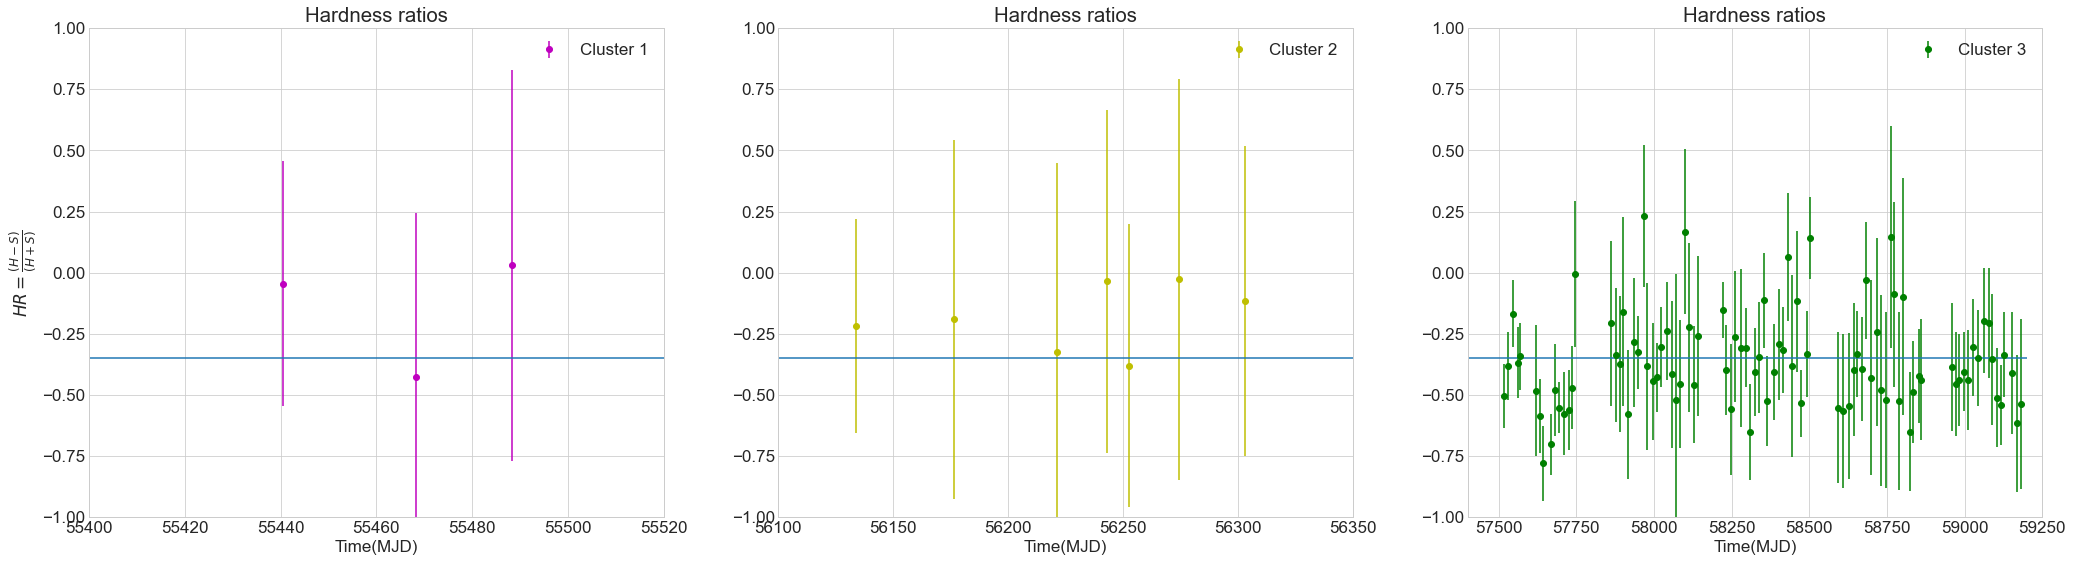

<Figure size 432x288 with 0 Axes>

In [36]:
color = ['om','oy','og'] #vector to put different colours in the graphic
fig, axs = plt.subplots(1,3,figsize=(35,9))
for i in range(3):
    axs[i].errorbar(ts_binned["Time"],ts_binned["Hardness ratios"], yerr=ts_binned["Error propagation"],fmt=color[i],label = f'{df_datos.cluster.values[i]}')
    axs[i].hlines(y=ts_binned["Hardness ratios"].mean(), xmin=55400, xmax=59200)
    axs[i].legend()
    axs[i].set_xlabel("Time(MJD)")
    axs[i].set_title("Hardness ratios") 
    axs[i].set(ylim=(-1,1))
    if i == 0:
        axs[i].set_ylabel("$HR=\\frac{(H-S)}{(H+S)}$")
        axs[i].set(xlim=(55400,55520))
    if i==1:
        axs[i].set(xlim=(56100,56350))
    if i==2:
        axs[i].set(xlim=(57400,59250))
plt.show()
plt.savefig('Hardness_ratios_Clustersbinned.png',bbox_inches='tight')

### Part 7: Representation of theoretical hardness ratios

> These are the HRs data given in the initial file. As we can see it's different for ours. Why? Because they calculate HR's in another way

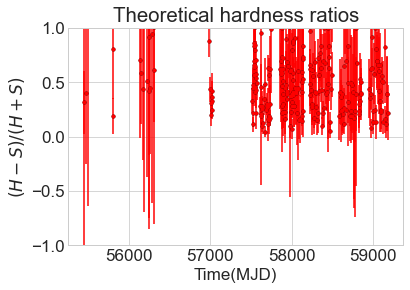

In [37]:
plt.title("Theoretical hardness ratios") 
datos=plt.errorbar(hard["Time"],hard["Theoretical HR"], yerr=hard["Theoretical HR Error"], fmt='.r')
plt.plot(hard["Time"],hard["Theoretical HR"],'.k')
plt.ylabel("$(H-S)/(H+S)$")                       
plt.xlabel("Time(MJD)") 
plt.ylim(-1,1)
plt.savefig('Hardness_theoretical.png', bbox_inches='tight')

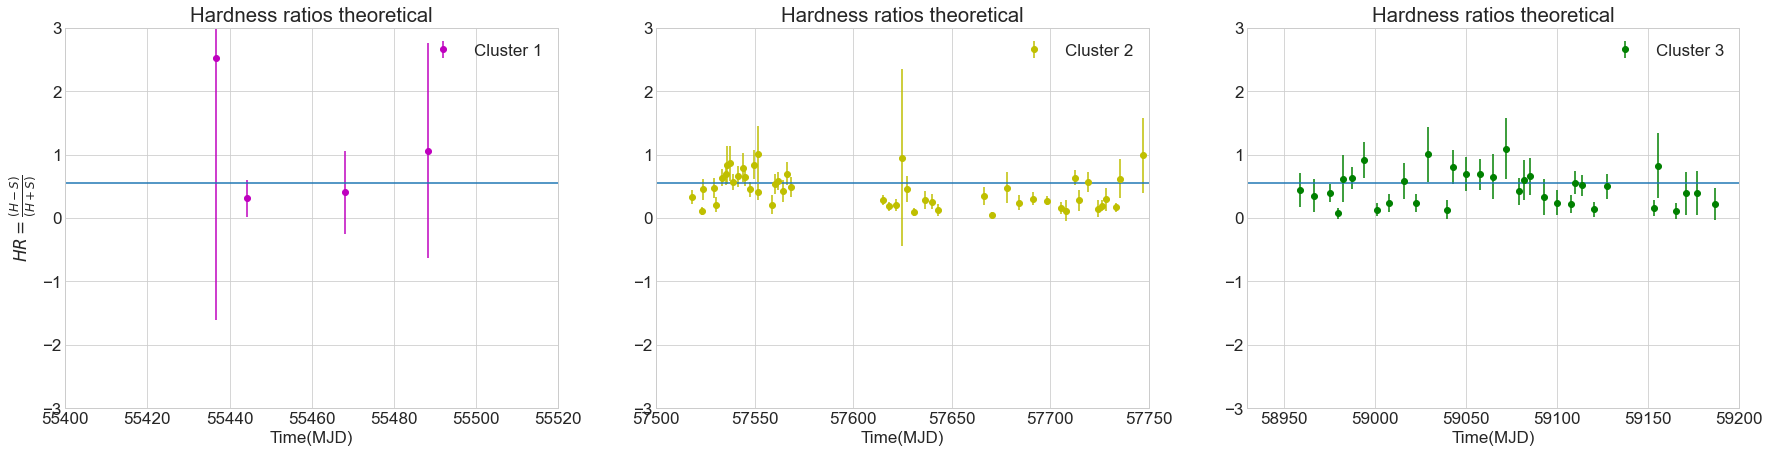

<Figure size 432x288 with 0 Axes>

In [38]:
color = ['om','oy','og'] #vector to put different colours in the graphic
fig, axs = plt.subplots(1,3,figsize=(30,7))
for i in range(3):
    axs[i].errorbar(hard["Time"],hard["Theoretical HR"], yerr=hard["Theoretical HR Error"],fmt=color[i],label = f'{df_datos.cluster.values[i]}')
    axs[i].hlines(y=hard["Theoretical HR"].mean(), xmin=55400, xmax=59200)
    axs[i].legend()
    axs[i].set_xlabel("Time(MJD)")
    axs[i].set_title("Hardness ratios theoretical") 
    axs[i].set(ylim=(-3,3))
    if i == 0:
        axs[i].set_ylabel("$HR=\\frac{(H-S)}{(H+S)}$")
        axs[i].set(xlim=(55400,55520))
    if i==1:
        axs[i].set(xlim=(57500,57750))
    if i==2:
        axs[i].set(xlim=(58930,59200))
plt.show()
plt.savefig('Hardness_ratios_Clusterstheo.png',bbox_inches='tight')

In [39]:
df_hard=QTable.from_pandas(df_hard)

In [40]:
df_hard["Time New"]=hard["TimeNew"]

ValueError: Inconsistent data column lengths

In [ ]:
df_hard.set_index(pd.DatetimeIndex(df_hard["TimeNew"]), inplace=True)
ts_light = TimeSeries.from_pandas(df_hard)

In [ ]:
plt.errorbar(ts_binned["Hardness ratios"],df_hard["source count-rate"], xerr=ts_binned["Error propagation"],yerr=df_hard["source error(+)"],fmt=color[i],label = f'{df_datos.cluster.values[i]}')
    #axs[i].hlines(y=ts_binned["Hardness ratios"].mean(), xmin=55400, xmax=59200)
plt.legend()
plt.xlabel("HR")
plt.title("Hardness ratio intensity") 
plt.ylabel("$Flux$")
plt.show()
plt.savefig('Hardness_ratios_intensity.png',bbox_inches='tight')